### DBSCAN clustering to identify outliers

In [9]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter


In [10]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

#### DBSCAN clustering to identify outliers

##### Train your model and identify outliers

In [17]:
df = pd.read_csv(filepath_or_buffer='F:\Learn R\Dataset\iris.csv')
df.columns=['Sepal Length','Sepal Width', 'Petal Length','Petal Width','Species']

data = df.iloc[:,0:4]
target = df.iloc[:,4]

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [12]:
model = DBSCAN(eps = 0.8, min_samples=19).fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


In [13]:
outliers_df = pd.DataFrame(data)
print (Counter(model.labels_))
print (outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
     Sepal Length  Sepal Width  Petal Length  Petal Width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


Text(0.5,1,'DBSCAN')

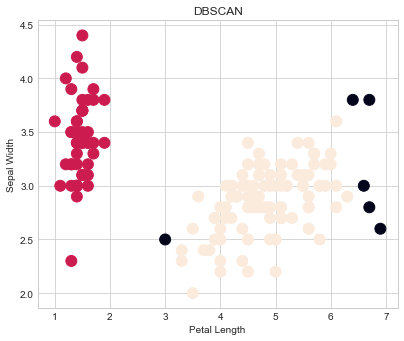

In [40]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_
ax.scatter(data.iloc[:,2], data.iloc[:,1],c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN')